In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Increasing the number of rows and columns shown since database has 65 columns
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Kepler Exoplanet Search Results

In [23]:
# Importing data
kepler = pd.read_csv('../datasets/cumulative.csv')

In [24]:
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### Dropping information and dealing with NaN values

In [25]:
# Removing columns with no valuable information for the project
kepler.drop(['rowid', 'kepid', 'koi_score', 'koi_kepmag', 'koi_fpflag_nt', 'koi_tce_delivname', 'koi_fpflag_ss', 'koi_tce_plnt_num', 'koi_model_snr', 'koi_time0bk', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_teq_err1', 'koi_teq_err2', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',  'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], axis=1, inplace=True)


In [26]:
# Checking the number of NaNs on the columns left
kepler.isnull().sum()

kepoi_name             0
kepler_name         7270
koi_disposition        0
koi_pdisposition       0
koi_period             0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_steff            363
koi_slogg            363
koi_srad             363
ra                     0
dec                    0
dtype: int64

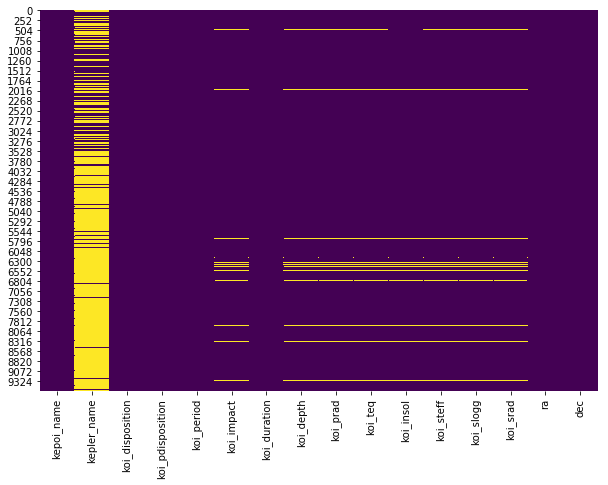

In [27]:
# Visualizing the NaN values left
plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar = False, cmap='viridis')

In [28]:
# Removing 'kepler_name' column since it has a lot of NaN values and we still have 'kepoi_name' for identification
kepler.drop('kepler_name', axis=1, inplace=True)

# Refresh previous windows to see the results

Keeping the rest of the rows with Nans since they are only >300 rows of missing information out of >9K.

### Renaming columns

In [29]:
# Renaming so it is more clear
kepler.rename(columns={'ra': 'right_ascension', 'dec': 'declination', 'koi_period': 'orb_period'}, inplace=True)

In [30]:
# Removing 'koi' from all the column names to make it easier to read

cols = kepler.columns

new_cols = []

for name in cols:
    if name.startswith('koi_'):
        name = name.replace('koi_', '')
        new_cols.append(name)
    else:
        new_cols.append(name)
        
kepler.columns = new_cols

In [31]:
kepler.head()

,kepoi_name,disposition,pdisposition,orb_period,impact,duration,depth,prad,teq,insol,steff,slogg,srad,right_ascension,declination
0,K00752.01,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,291.93423,48.141651
1,K00752.02,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,291.93423,48.141651
2,K00753.01,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,297.00482,48.134129
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,285.53461,48.285210
4,K00755.01,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,288.75488,48.226200


Now that we've removed all the information we want, let's check if the information left is the right type to be able to start working


In [32]:
kepler.dtypes

kepoi_name          object
disposition         object
pdisposition        object
orb_period         float64
impact             float64
duration           float64
depth              float64
prad               float64
teq                float64
insol              float64
steff              float64
slogg              float64
srad               float64
right_ascension    float64
declination        float64
dtype: object

All the columns expected to be numeric are float64 and the ones expected to be strings are object, so there's nothing to change.

# Outliers

### IQR

In [33]:
# Selecting only the columns with numeric data
kepler_outliers = kepler._get_numeric_data()
kepler_outliers.head()

,orb_period,impact,duration,depth,prad,teq,insol,steff,slogg,srad,right_ascension,declination
0,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,291.93423,48.141651
1,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,291.93423,48.141651
2,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,297.00482,48.134129
3,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,285.53461,48.285210
4,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,288.75488,48.226200


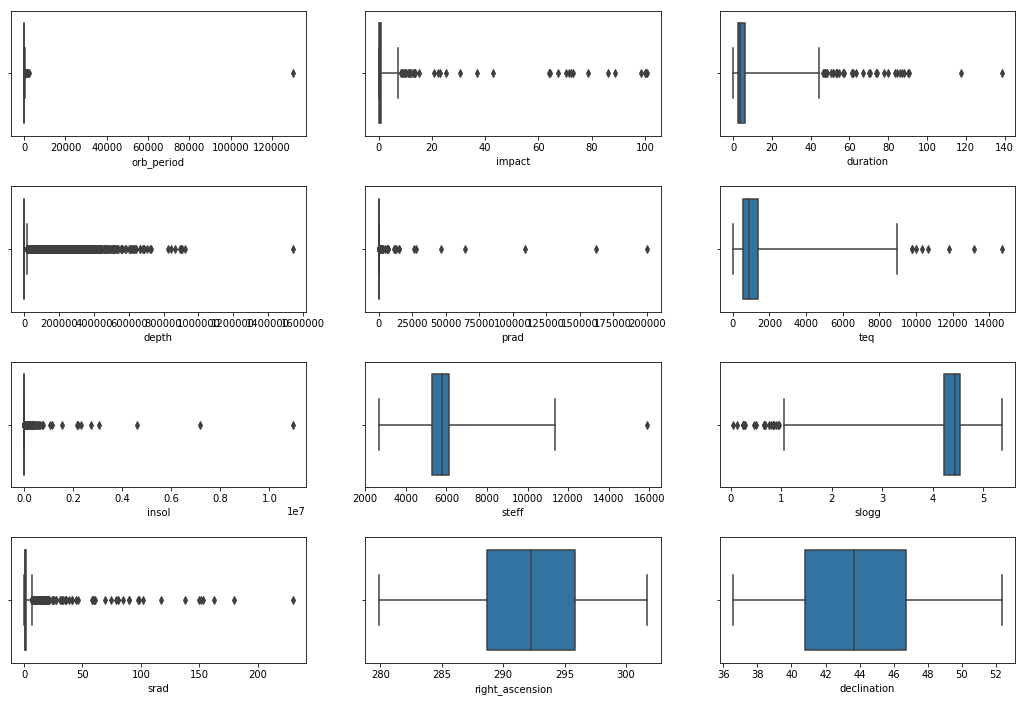

In [34]:
# Visualizing the outliers with boxplots
f = plt.figure(figsize=(18, 12))
i=1
import math
for col in kepler_outliers.columns:
    subplot = f.add_subplot(math.ceil(kepler_outliers.shape[1]/3),3,i)
    sns.boxplot(x=kepler_outliers[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4)
plt.show()

## Removing outliers on the whole table

In [35]:
# Calculating de IQR
#Q1 = kepler_outliers.quantile(.25)
#Q3 = kepler_outliers.quantile(.75)
#IQR = Q3 - Q1
#IQR

#Checking how much information we have left
#kepler_o1 = kepler_outliers[~((kepler_outliers < (Q1 - 1.5 * IQR)) |(kepler_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
#kepler_o1.shape

In [36]:
#kepler.shape

Since we've lost too much information, from 9564 to 4508, we change from 1.5 to 3. 

In [37]:
#kepler_o3 = kepler_outliers[~((kepler_outliers < (Q1 - 3 * IQR)) |(kepler_outliers > (Q3 + 3 * IQR))).any(axis=1)]
#kepler_o3.shape

In [38]:
# Merging df without outliers with the object information from original df

#kepler_clean = kepler[kepler.index.isin(kepler_o3.index)]
#kepler_clean.head()

### 2.4. Saving CSV

In [39]:
# Saving clean df with outliers
kepler.to_csv('../datasets/kepler.csv', index=False)

In [40]:
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = 'xvoldemortx00'
ip = '35.198.146.55'
database = 'exoplanets'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

kepler.to_sql('kepler', con=engine, if_exists='replace')
#kepler_clean.to_sql('kepler_o', con=engine, if_exists='replace')